In [1]:
# Standard library imports
import os
import json
from warnings import simplefilter

# Third-party imports
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
from scipy.optimize import minimize
from scipy.stats import bernoulli, gaussian_kde
from scipy.special import expit as sigmoid
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    cross_val_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic
from sklearn.metrics import pairwise_distances, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

# Ignore future warnings for cleaner output
simplefilter(action="ignore", category=FutureWarning)

# Matplotlib settings
plt.rcParams["text.usetex"] = True
plt.rcParams.update({"font.family": "serif", "font.serif": ["Times New Roman"]})

# Load Immu Dataset

In [2]:
# Function to load JSON file
def load_json(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    return data

Immu_Graph_Name_ID_class = load_json("../../Dataset/Immu_Graph_Name_ID_class.json")

# Split into Train and Test Dataset

In [3]:
Immu_Graph_Name_ID = list(Immu_Graph_Name_ID_class.keys())
Immu_Graph_Class_Text = list(Immu_Graph_Name_ID_class.values())

In [4]:
Immu_Graph_Class = []
for i in range(0, len(Immu_Graph_Class_Text)):
    if Immu_Graph_Class_Text[i] == "No":
        Immu_Graph_Class.append(0)
    elif Immu_Graph_Class_Text[i] == "Yes":
        Immu_Graph_Class.append(1)
    else:
        print("error")

In [5]:
matrix_no_index_list = []
matrix_yes_index_list = []

for i in range(0, len(Immu_Graph_Name_ID)):
    if Immu_Graph_Name_ID_class[Immu_Graph_Name_ID[i]] == "No":
        matrix_no_index_list.append(i)

    elif Immu_Graph_Name_ID_class[Immu_Graph_Name_ID[i]] == "Yes":
        matrix_yes_index_list.append(i)
    else:
        print("error")

In [6]:
matrix_no_index_list_train, matrix_no_index_list_test = train_test_split(
    matrix_no_index_list, random_state=42, test_size=0.2
)

matrix_yes_index_list_train, matrix_yes_index_list_test = train_test_split(
    matrix_yes_index_list, random_state=42, test_size=0.2
)

In [7]:
train_index = list(matrix_no_index_list_train) + list(matrix_yes_index_list_train)

test_index = list(matrix_no_index_list_test) + list(matrix_yes_index_list_test)

In [8]:
Immu_Graph_Class_train = [Immu_Graph_Class[i] for i in train_index]
Immu_Graph_Class_test = [Immu_Graph_Class[i] for i in test_index]

# Load Postprocessed Distance Matrix Data from MacroSimGNN
## These Distance Matrix Data as the same index order as the Immu Data

In [9]:
with open("macrosimgnn_immu_graphs.pkl", "rb") as f:
    macrosimgnn_immu_graphs = pickle.load(f)

## Display similarity or dissimilarity matrix

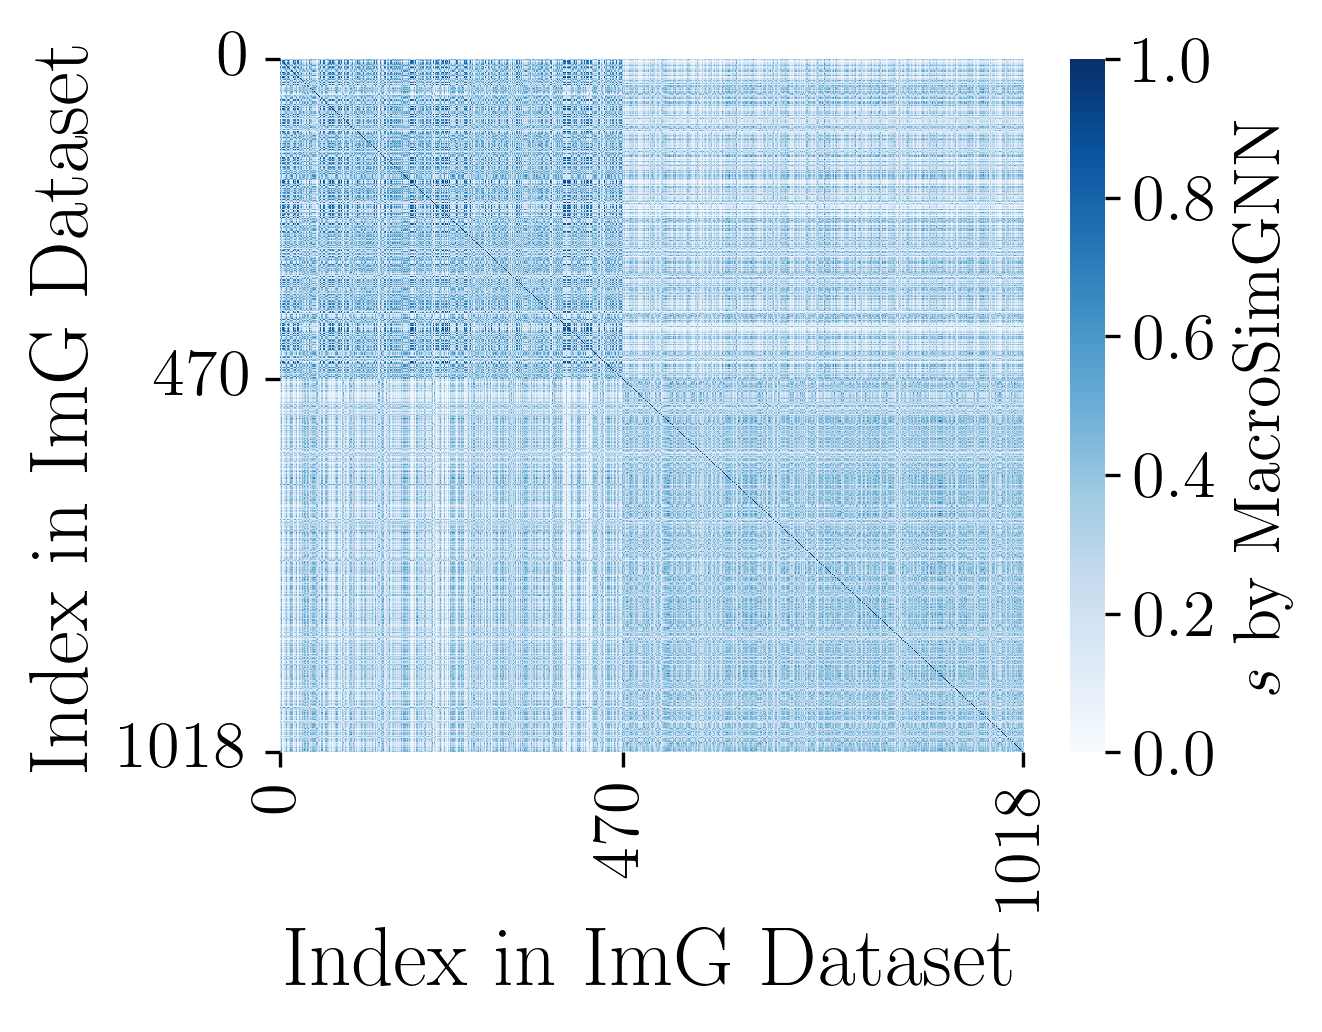

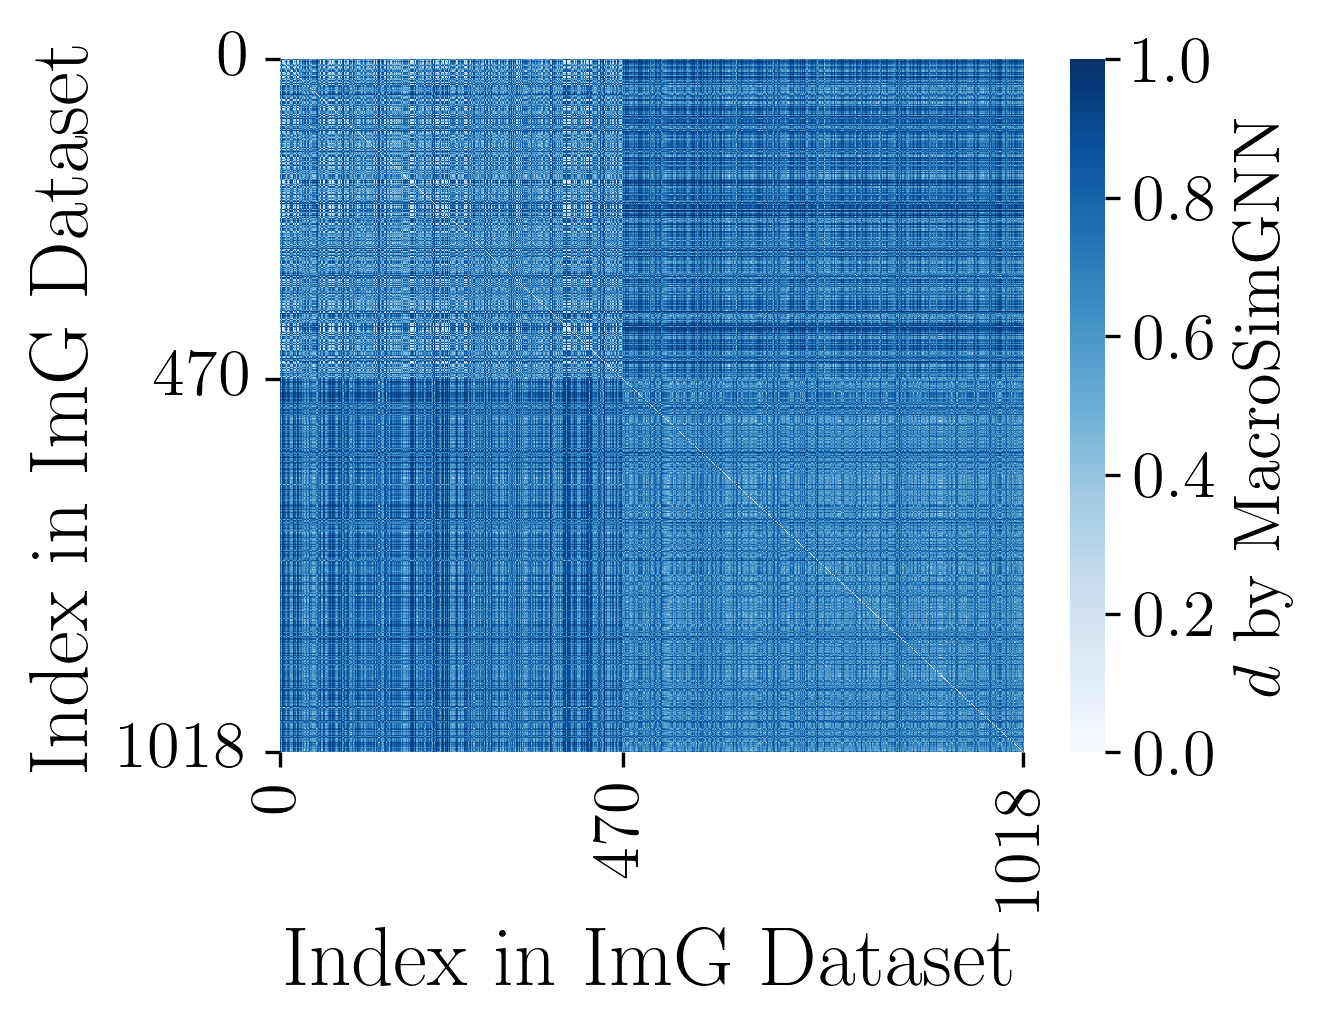

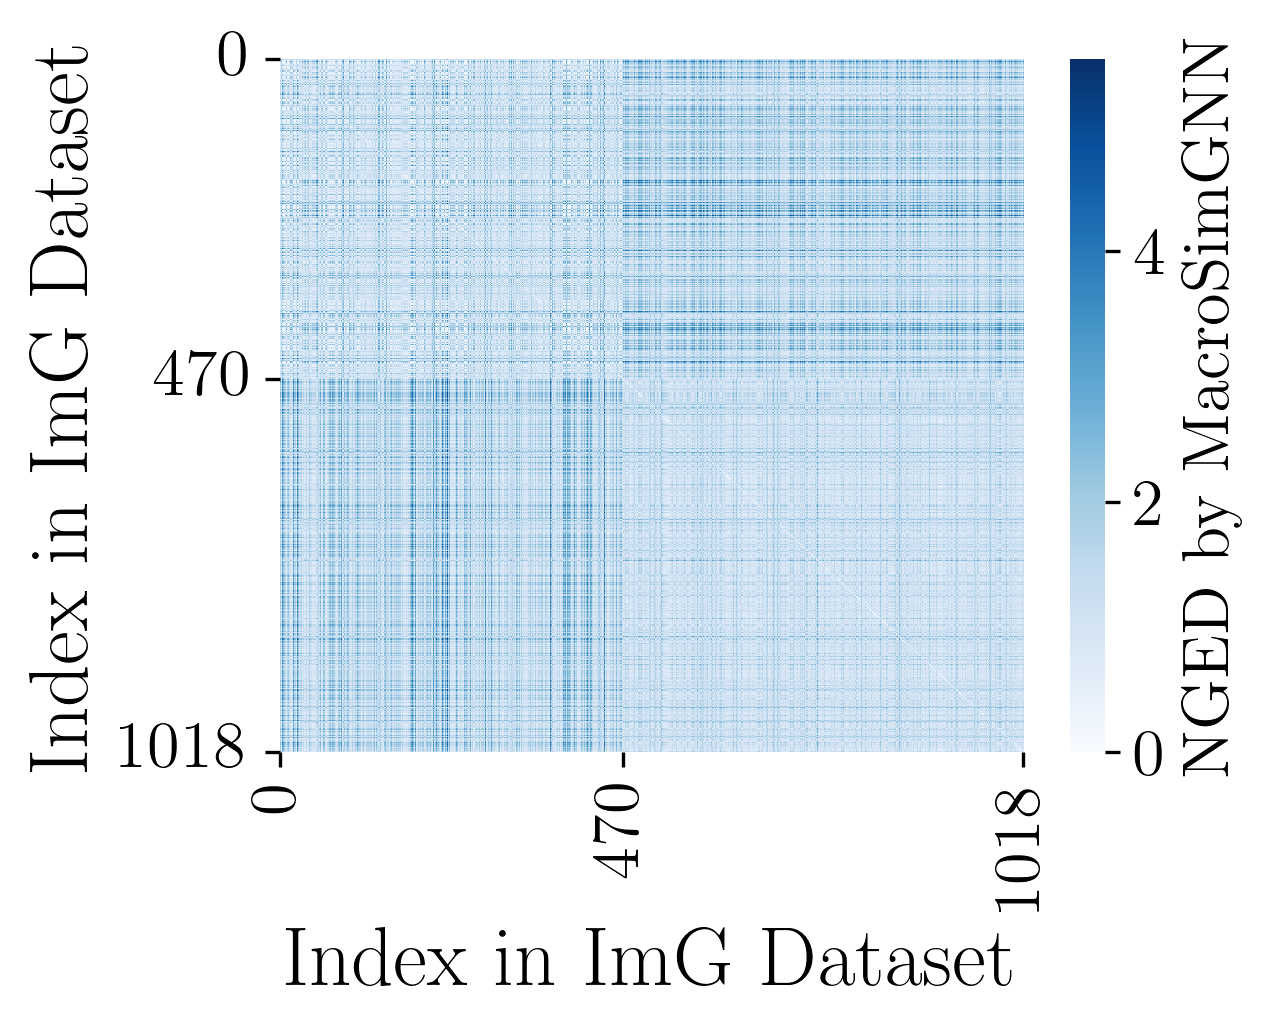

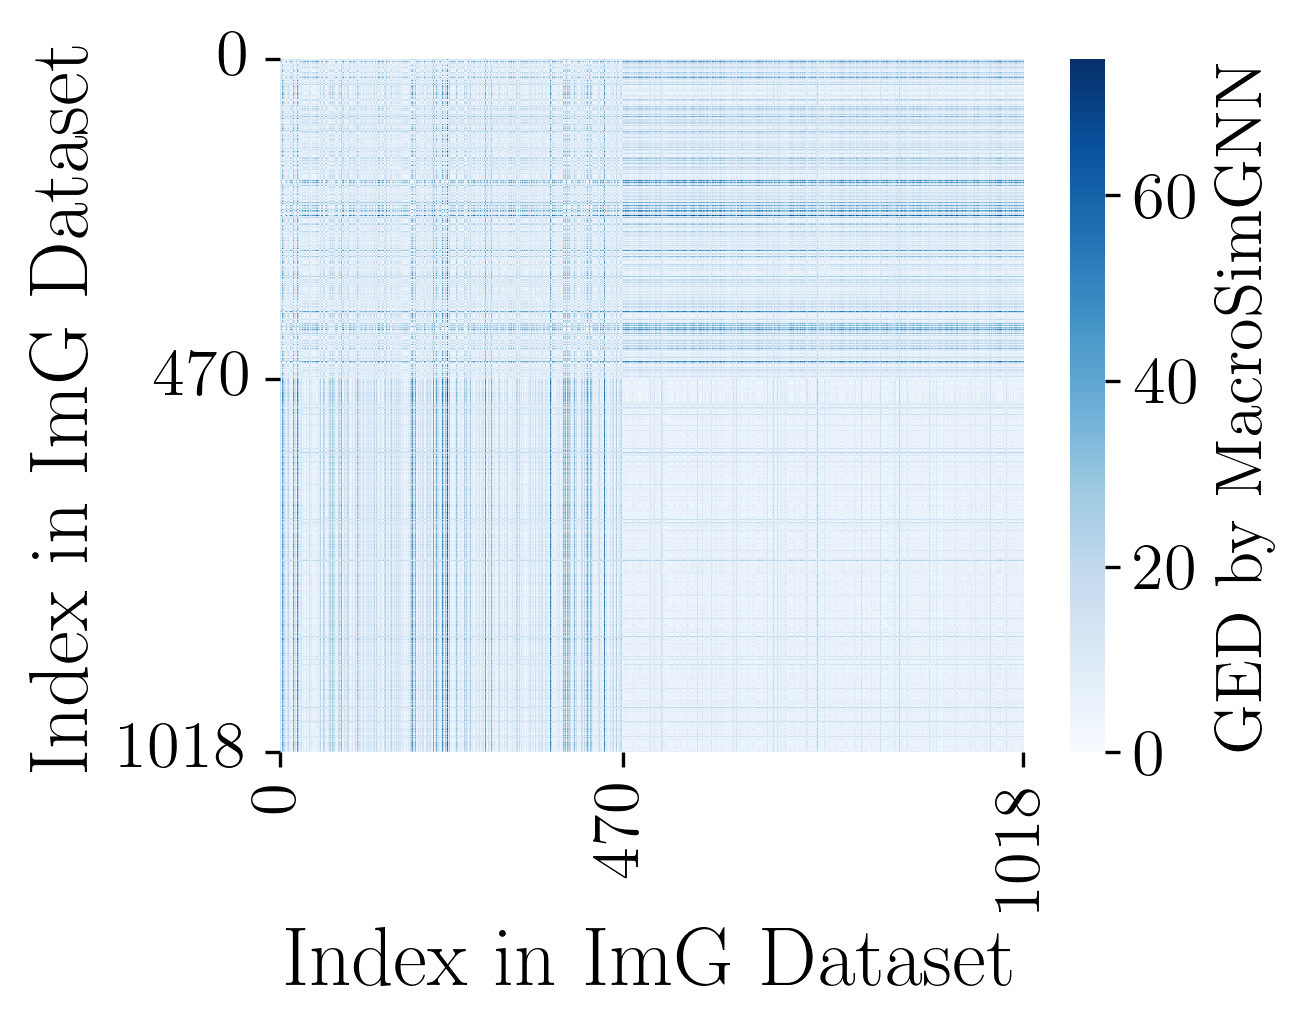

In [10]:
plt.figure(figsize=(4, 3), dpi=300)

sns.heatmap(
    macrosimgnn_immu_graphs["s_matrix"],
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": r"$s$ by MacroSimGNN"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel(r"$s$ by MacroSimGNN", fontsize=16)
plt.show()

plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    macrosimgnn_immu_graphs["d_matrix"],
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": r"$d$ by MacroSimGNN"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel(r"$d$ by MacroSimGNN", fontsize=16)
plt.show()

plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    macrosimgnn_immu_graphs["nged_matrix"],
    cmap="Blues",
    vmin=0,
    cbar_kws={"label": "NGED by MacroSimGNN"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("NGED by MacroSimGNN", fontsize=16)
plt.show()

plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    macrosimgnn_immu_graphs["ged_matrix"],
    cmap="Blues",
    vmin=0,
    cbar_kws={"label": "GED by MacroSimGNN"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("GED by MacroSimGNN", fontsize=16)
plt.show()

## PCA

### PCA with dissimilarity ($d$) matrix

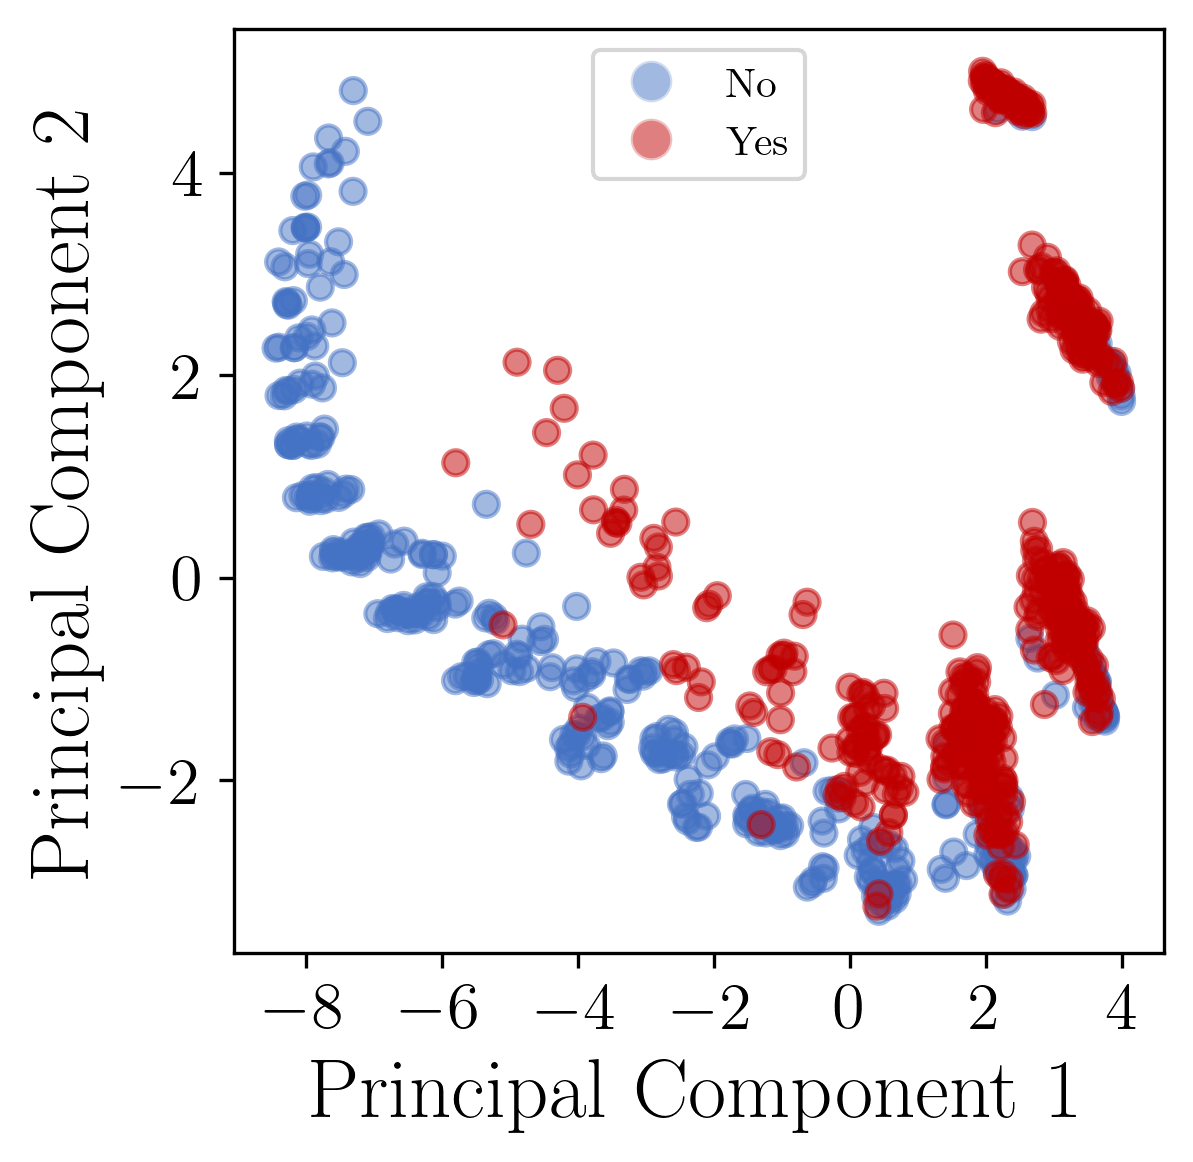

In [11]:
colors = []
labels = []
for i in range(0, len(Immu_Graph_Class)):
    if Immu_Graph_Class[i] == 0:
        colors.append("#4472C4")
        labels.append("No")
    elif Immu_Graph_Class[i] == 1:
        colors.append("#C00000")
        labels.append("Yes")
    else:
        print("error")

n_components = 2
LndS = PCA(n_components=n_components, random_state=42)
LndS.fit(macrosimgnn_immu_graphs["d_matrix"])
X = LndS.transform(macrosimgnn_immu_graphs["d_matrix"])
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(X[:, 0], X[:, 1], color=colors, label=labels, alpha=0.5)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#4472C4",
        markersize=10,
        alpha=0.5,
        label="No",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#C00000",
        markersize=10,
        alpha=0.5,
        label="Yes",
    ),
]
plt.legend(handles=legend_elements, loc="upper center")
plt.xlabel("Principal Component 1", size=20)
plt.ylabel("Principal Component 2", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### PCA with NGED matrix

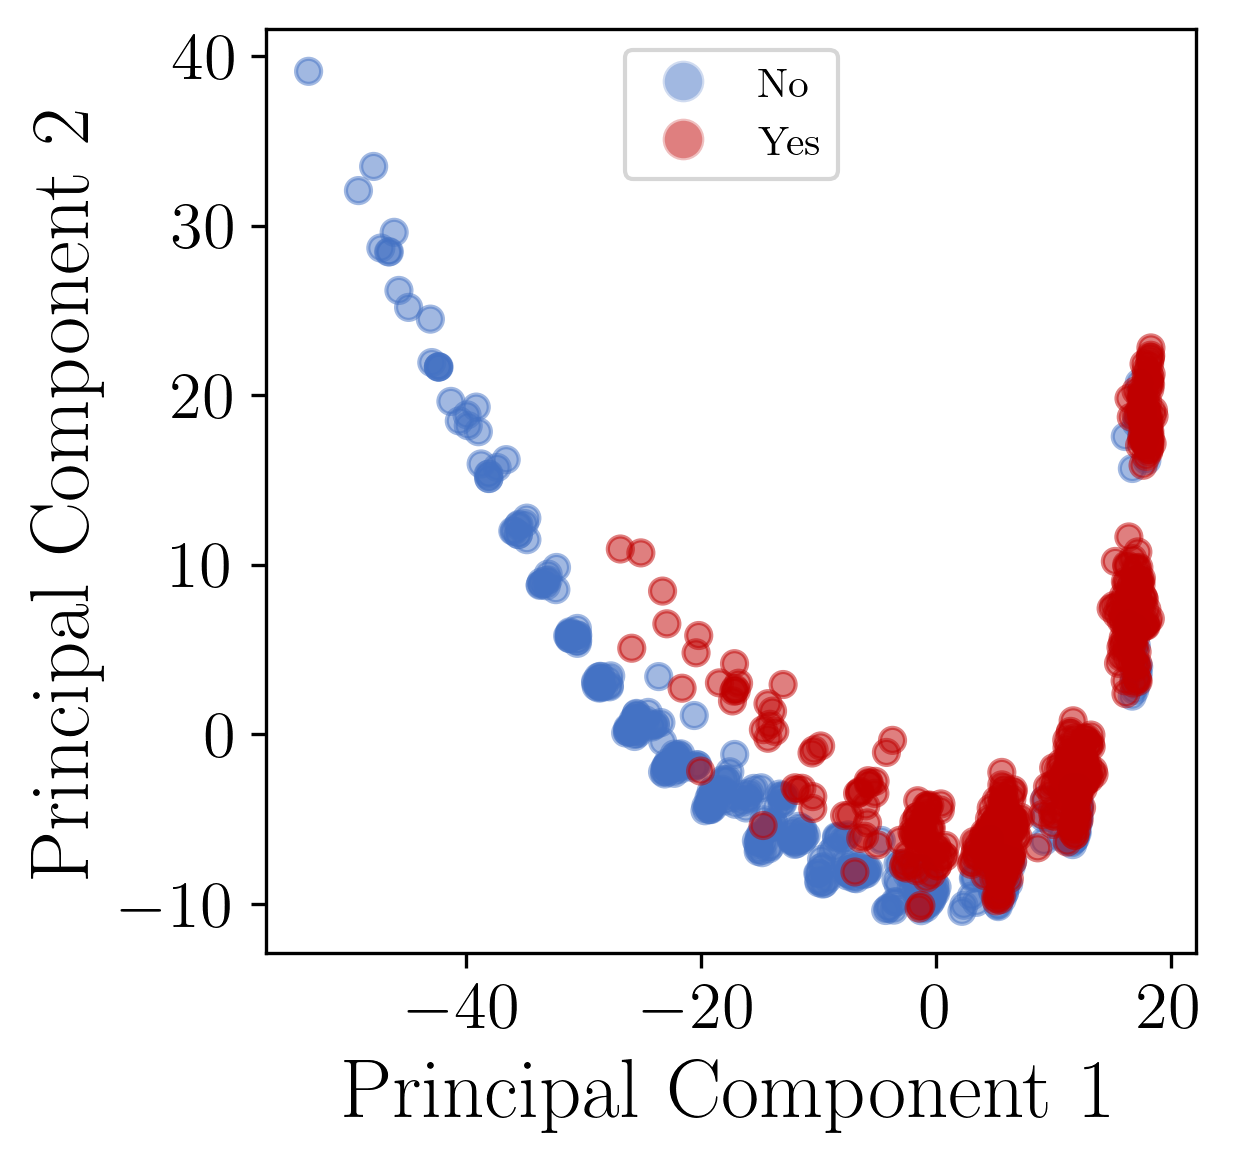

In [12]:
colors = []
labels = []
for i in range(0, len(Immu_Graph_Class)):
    if Immu_Graph_Class[i] == 0:
        colors.append("#4472C4")
        labels.append("No")
    elif Immu_Graph_Class[i] == 1:
        colors.append("#C00000")
        labels.append("Yes")
    else:
        print("error")

n_components = 2
LndS = PCA(n_components=n_components, random_state=42)
LndS.fit(macrosimgnn_immu_graphs["nged_matrix"])
X = LndS.transform(macrosimgnn_immu_graphs["nged_matrix"])
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(X[:, 0], X[:, 1], color=colors, label=labels, alpha=0.5)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#4472C4",
        markersize=10,
        alpha=0.5,
        label="No",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#C00000",
        markersize=10,
        alpha=0.5,
        label="Yes",
    ),
]
plt.legend(handles=legend_elements, loc="upper center")
plt.xlabel("Principal Component 1", size=20)
plt.ylabel("Principal Component 2", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### PCA with GED matrix

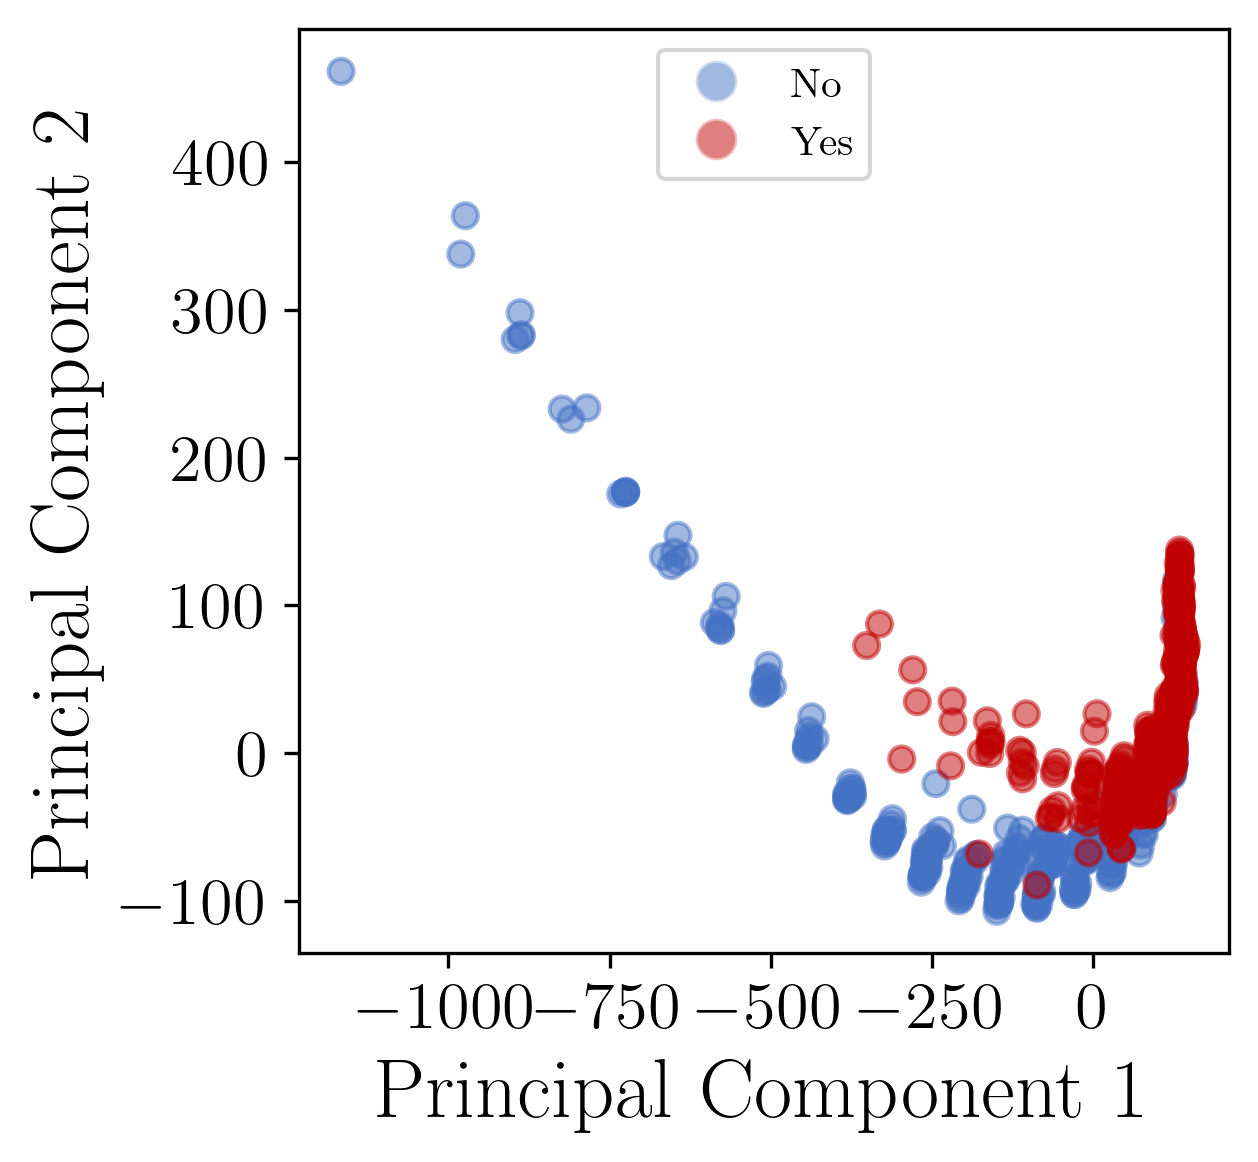

In [13]:
colors = []
labels = []
for i in range(0, len(Immu_Graph_Class)):
    if Immu_Graph_Class[i] == 0:
        colors.append("#4472C4")
        labels.append("No")
    elif Immu_Graph_Class[i] == 1:
        colors.append("#C00000")
        labels.append("Yes")
    else:
        print("error")

n_components = 2
LndS = PCA(n_components=n_components, random_state=42)
LndS.fit(macrosimgnn_immu_graphs["ged_matrix"])
X = LndS.transform(macrosimgnn_immu_graphs["ged_matrix"])
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(X[:, 0], X[:, 1], color=colors, label=labels, alpha=0.5)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#4472C4",
        markersize=10,
        alpha=0.5,
        label="No",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#C00000",
        markersize=10,
        alpha=0.5,
        label="Yes",
    ),
]
plt.legend(handles=legend_elements, loc="upper center")
plt.xlabel("Principal Component 1", size=20)
plt.ylabel("Principal Component 2", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Gaussian Process Classification (GPC)

### GPC with dissimilarity (d) matrix

0.9607843137254902
Optimized Kernel: 42.6**2 * RBF(length_scale=15.8)
Optimized Constant Kernel: 1817.3279544220723
Optimized RBF Length Scale: 15.825662106942964


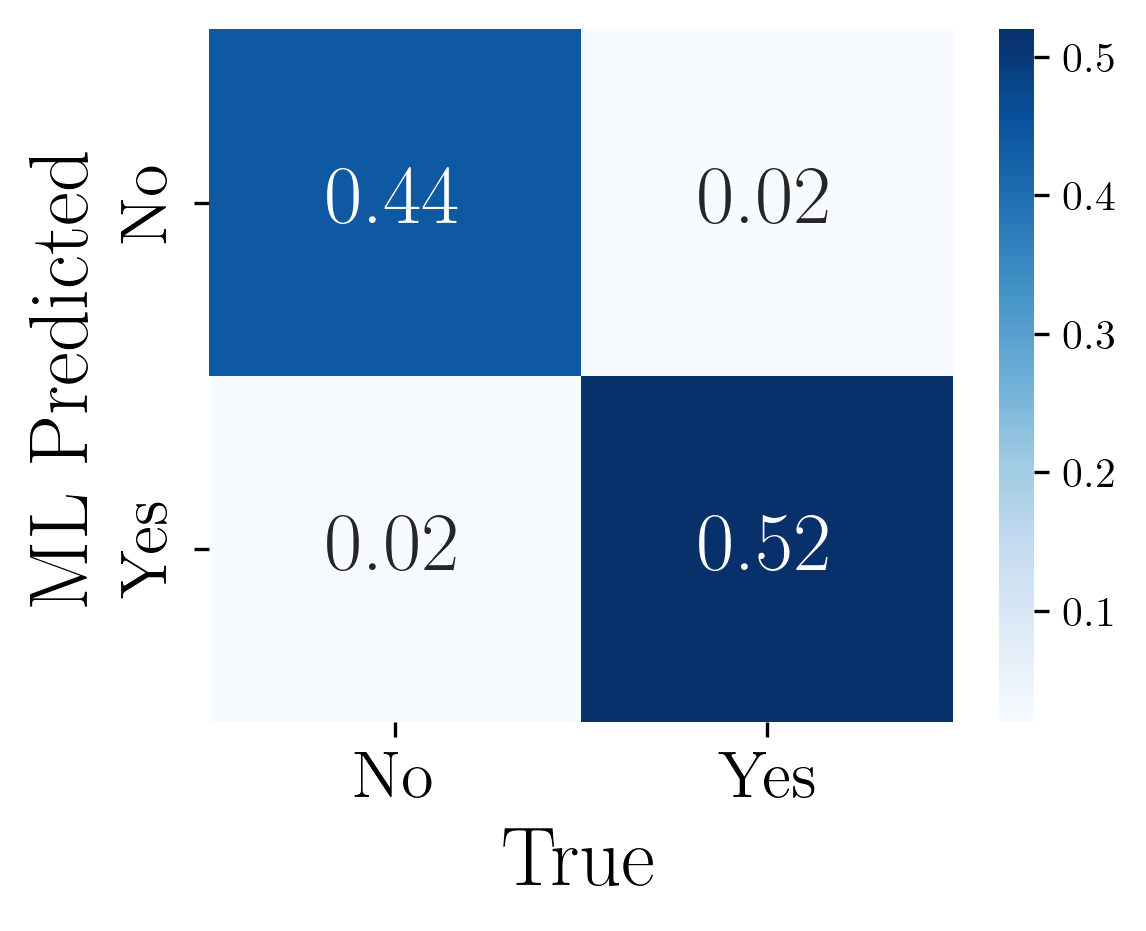

In [14]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(macrosimgnn_immu_graphs["d_matrix"][train_index, :], Immu_Graph_Class_train)
gpc_score = gpc.score(
    macrosimgnn_immu_graphs["d_matrix"][test_index, :], Immu_Graph_Class_test
)
print(gpc_score)
optimized_kernel = gpc.kernel_
print("Optimized Kernel:", optimized_kernel)
print("Optimized Constant Kernel:", optimized_kernel.k1.constant_value)
print("Optimized RBF Length Scale:", optimized_kernel.k2.length_scale)

y_train_predict = gpc.predict(macrosimgnn_immu_graphs["d_matrix"][train_index, :])
y_test_predict = gpc.predict(macrosimgnn_immu_graphs["d_matrix"][test_index, :])
gpc_cf_matrix_train = confusion_matrix(y_train_predict, Immu_Graph_Class_train)
gpc_cf_matrix_test = confusion_matrix(y_test_predict, Immu_Graph_Class_test)
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.heatmap(
    gpc_cf_matrix_test / gpc_cf_matrix_test.sum(),
    fmt=".2f",
    annot=True,
    cmap="Blues",
    annot_kws={"size": 20},
)  # , categories=categories, ,fmt='.2f%'
ax.set_xticklabels(["No", "Yes"], size=16)
ax.set_yticklabels(["No", "Yes"], size=16)
ax.set_ylabel("ML Predicted", fontsize=20)
ax.set_xlabel("True", fontsize=20)
plt.show()

### GPC with NGED matrix

0.9607843137254902
Optimized Kernel: 115**2 * RBF(length_scale=79)
Optimized Constant Kernel: 13302.574776646765
Optimized RBF Length Scale: 78.99753862505233


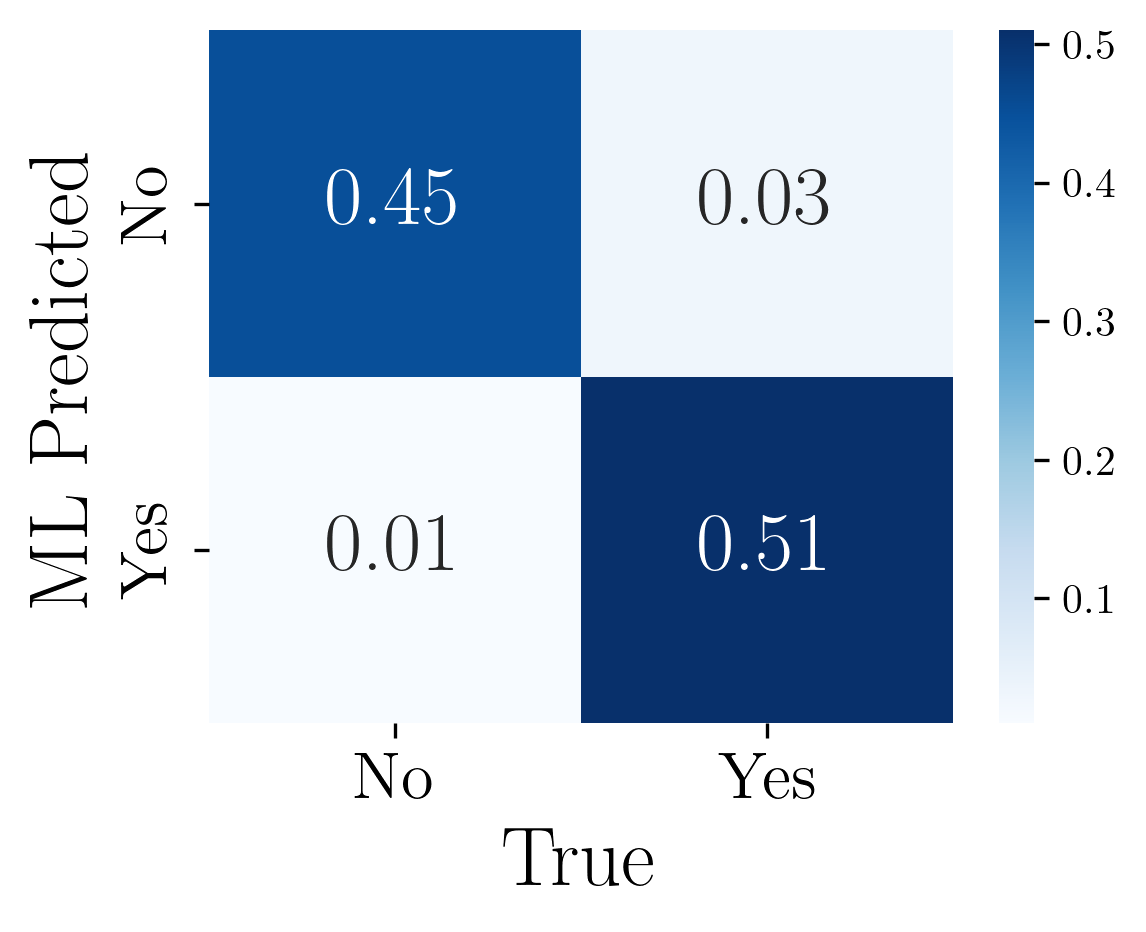

In [15]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(macrosimgnn_immu_graphs["nged_matrix"][train_index, :], Immu_Graph_Class_train)
gpc_score = gpc.score(
    macrosimgnn_immu_graphs["nged_matrix"][test_index, :], Immu_Graph_Class_test
)
print(gpc_score)
optimized_kernel = gpc.kernel_
print("Optimized Kernel:", optimized_kernel)
print("Optimized Constant Kernel:", optimized_kernel.k1.constant_value)
print("Optimized RBF Length Scale:", optimized_kernel.k2.length_scale)

y_train_predict = gpc.predict(macrosimgnn_immu_graphs["nged_matrix"][train_index, :])
y_test_predict = gpc.predict(macrosimgnn_immu_graphs["nged_matrix"][test_index, :])
gpc_cf_matrix_train = confusion_matrix(y_train_predict, Immu_Graph_Class_train)
gpc_cf_matrix_test = confusion_matrix(y_test_predict, Immu_Graph_Class_test)
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.heatmap(
    gpc_cf_matrix_test / gpc_cf_matrix_test.sum(),
    fmt=".2f",
    annot=True,
    cmap="Blues",
    annot_kws={"size": 20},
)  # , categories=categories, ,fmt='.2f%'
ax.set_xticklabels(["No", "Yes"], size=16)
ax.set_yticklabels(["No", "Yes"], size=16)
ax.set_ylabel("ML Predicted", fontsize=20)
ax.set_xlabel("True", fontsize=20)
plt.show()

### GPC with GED matrix

0.9607843137254902
Optimized Kernel: 220**2 * RBF(length_scale=956)
Optimized Constant Kernel: 48358.116683945016
Optimized RBF Length Scale: 956.1258190454507


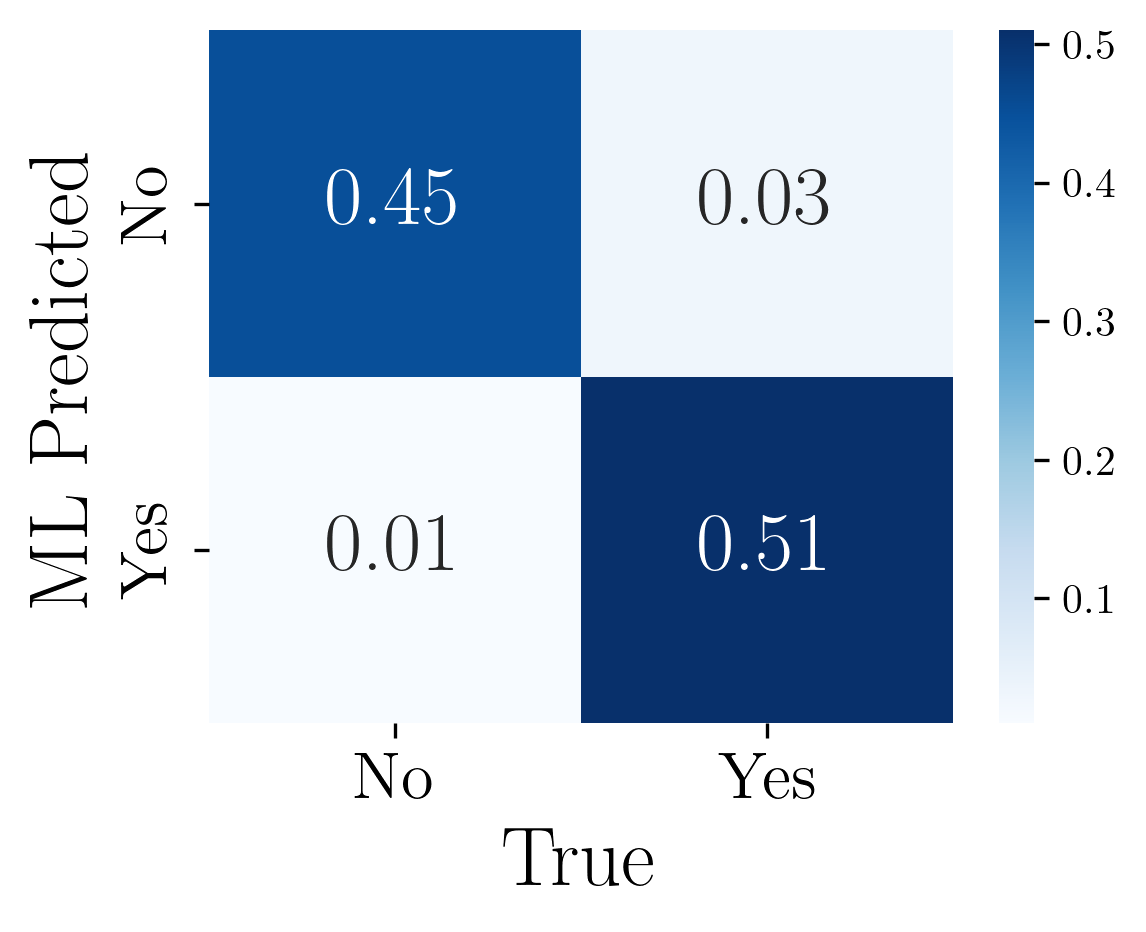

In [16]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(macrosimgnn_immu_graphs["ged_matrix"][train_index, :], Immu_Graph_Class_train)
gpc_score = gpc.score(
    macrosimgnn_immu_graphs["ged_matrix"][test_index, :], Immu_Graph_Class_test
)
print(gpc_score)
optimized_kernel = gpc.kernel_
print("Optimized Kernel:", optimized_kernel)
print("Optimized Constant Kernel:", optimized_kernel.k1.constant_value)
print("Optimized RBF Length Scale:", optimized_kernel.k2.length_scale)

y_train_predict = gpc.predict(macrosimgnn_immu_graphs["ged_matrix"][train_index, :])
y_test_predict = gpc.predict(macrosimgnn_immu_graphs["ged_matrix"][test_index, :])
gpc_cf_matrix_train = confusion_matrix(y_train_predict, Immu_Graph_Class_train)
gpc_cf_matrix_test = confusion_matrix(y_test_predict, Immu_Graph_Class_test)
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.heatmap(
    gpc_cf_matrix_test / gpc_cf_matrix_test.sum(),
    fmt=".2f",
    annot=True,
    cmap="Blues",
    annot_kws={"size": 20},
)  # , categories=categories, ,fmt='.2f%'
ax.set_xticklabels(["No", "Yes"], size=16)
ax.set_yticklabels(["No", "Yes"], size=16)
ax.set_ylabel("ML Predicted", fontsize=20)
ax.set_xlabel("True", fontsize=20)
plt.show()